In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

## Day 32 Lecture 2 Assignment

In this assignment, we will learn about SVM. We will use the csection dataset loaded below and analyze the model generated for this dataset.

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

<IPython.core.display.Javascript object>

In [3]:
# Age -  ranges from 18 to 40
# Delivery number - ranges from 1 to 4
# Delivery time -  {0 = timely , 1 = premature , 2 = latecomer}
# Blood of Pressure - {0 = low , 1 = normal , 2 = high }
# Heart Problem - {0 = apt, 1 = inept }

# Target - Caesarian - {0 = No, 1 = Yes }

csection = pd.read_csv(
    "https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/csection.csv"
)

<IPython.core.display.Javascript object>

Our goal is to predict the patient needed a csection.

In [4]:
csection.head()

,Age,Delivery number,Delivery time,Blood Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1


<IPython.core.display.Javascript object>

Check whether the data has missing values and remove all rows containing missing values.

In [5]:
print(csection.shape)
csection.info()

(80, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              80 non-null     int64
 1   Delivery number  80 non-null     int64
 2   Delivery time    80 non-null     int64
 3   Blood Pressure   80 non-null     int64
 4   Heart Problem    80 non-null     int64
 5   Caesarian        80 non-null     int64
dtypes: int64(6)
memory usage: 3.9 KB


<IPython.core.display.Javascript object>

Examine the distribution of delivery number, blood pressure and heart problem.

In [11]:
csection["Delivery number"].value_counts()

1    41
2    27
3    10
4     2
Name: Delivery number, dtype: int64

<IPython.core.display.Javascript object>

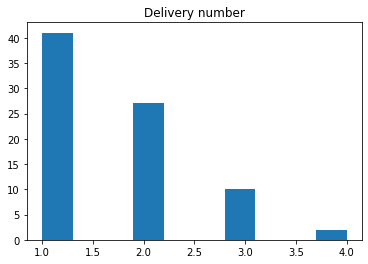

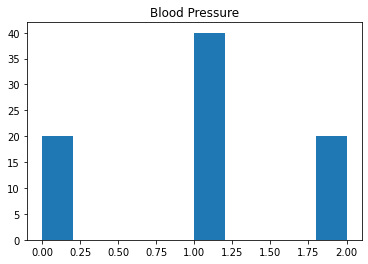

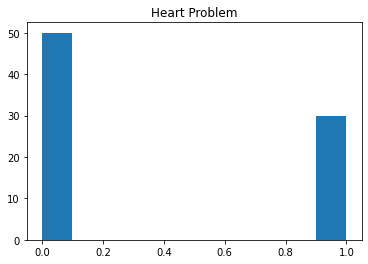

<IPython.core.display.Javascript object>

In [8]:
for elem in ["Delivery number", "Blood Pressure", "Heart Problem"]:
    plt.hist(csection[elem])
    plt.title(elem)
    plt.show()

What are your conclusions from the distribtuions of these variables? Write them below.

Delivery number has negative skew,

Create dummy variables from all columns containing categorical variables with more than two values.

In [18]:
def one_hot_encode(X, encode_cols, index=None):
    other_cols = [c for c in X.columns if c not in encode_cols]

    ct = ColumnTransformer(
        #   Format
        #   [("name of step", what_to_do(), [what columns to do it to])]
        [("one hot encode", OneHotEncoder(drop="first", sparse=False), encode_cols)],
        remainder="passthrough",
    )

    ct.fit(X)

    # This is not the flexible and definitely not the most
    # readable way to get column names, a function would be better
    encoded_names = ct.transformers_[0][1].get_feature_names()
    encoded_names = list(encoded_names)

    X_encoded = ct.transform(X)
    X_encoded = pd.DataFrame(X_encoded, columns=encoded_names + other_cols, index=index)

    return X_encoded

<IPython.core.display.Javascript object>

In [24]:
csection = one_hot_encode(
    csection,
    encode_cols=["Delivery number", "Delivery time", "Blood Pressure"],
    index=csection.index,
)

<IPython.core.display.Javascript object>

In [25]:
csection

,x0_2,x0_3,x0_4,x1_1,x1_2,x2_1,x2_2,Age,Heart Problem,Caesarian
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,22.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,26.0,0.0,1.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,26.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,22.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
75,1.0,0.0,0.0,1.0,0.0,1.0,0.0,27.0,0.0,0.0
76,0.0,0.0,1.0,0.0,0.0,1.0,0.0,33.0,0.0,1.0
77,1.0,0.0,0.0,1.0,0.0,0.0,1.0,29.0,0.0,1.0
78,0.0,0.0,0.0,0.0,1.0,0.0,0.0,25.0,0.0,1.0


<IPython.core.display.Javascript object>

Split the data into test and train with test containing 20% of the data.

In [29]:
X = csection.drop(columns=["Caesarian"])
y = csection["Caesarian"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=11, stratify=y
)

<IPython.core.display.Javascript object>

Use the linear kernel to train a SVC model on our training data. Report the scores for the training and test data.

In [33]:
model = SVC(kernel="linear")
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

<IPython.core.display.Javascript object>

In [34]:
print(model.score(X_train, y_train), "\n")
print(model.score(X_test, y_test))

0.7708333333333334 

0.5625


<IPython.core.display.Javascript object>

In [37]:
model.coef_

array([[ 4.99948938e-01, -2.51372759e-01,  1.00000000e+00,
        -2.12274642e-13, -4.99723684e-01, -1.75030232e+00,
        -2.50698907e-01,  1.86120247e-04,  7.49628472e-01]])

<IPython.core.display.Javascript object>